In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import serial
from time import sleep
import csv
import pandas as pd
import functools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras import regularizers
from keras.callbacks import EarlyStopping

In [9]:
#Loading the dataset
filename="data.csv"
dataset=pd.read_csv(filename)
#splitting the dataset into input features (x) and features we wish to predict(y)
inX=dataset.iloc[:,1:81].values
outY=dataset.iloc[:,0:1].values

#preprocessing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(inX)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(outY).toarray()
from sklearn.model_selection import train_test_split
#Splitting the data into training samples and testing samples
X_train,X_test,y_train,y_test = train_test_split(inX,y,test_size = 0.3)

C:\Users\markj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
#Defining the model
model = Sequential()
model.add(Dense(50, activation="relu", input_dim=80))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [28]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=80)
history = model.fit(X_train, y_train,verbose=1,validation_data =(X_test,y_test),epochs=200,batch_size=25,callbacks=[es])
#Saving the model
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Train on 1750 samples, validate on 750 samples
Epoch 1/200
1750/1750 [==============================] - 1s 828us/step - loss: 1.7849 - accuracy: 0.2171 - val_loss: 1.5484 - val_accuracy: 0.3147
Epoch 2/200
1750/1750 [==============================] - 1s 424us/step - loss: 1.5142 - accuracy: 0.3274 - val_loss: 1.5451 - val_accuracy: 0.2613
Epoch 3/200
1750/1750 [==============================] - 1s 479us/step - loss: 1.4700 - accuracy: 0.3326 - val_loss: 1.4092 - val_accuracy: 0.4587
Epoch 4/200
1750/1750 [==============================] - 1s 456us/step - loss: 1.3863 - accuracy: 0.4011 - val_loss: 1.4146 - val_accuracy: 0.3560
Epoch 5/200
1750/1750 [==============================] - 1s 455us/step - loss: 1.3597 - accuracy: 0.4040 - val_loss: 1.3217 - val_accuracy: 0.4880
Epoch 6/200
1750/1750 [==============================] - 1s 441us/step - loss: 1.2852 - accuracy: 0.4863 - val_loss: 1.3653 - val_accuracy: 0.5440
Epoch 7/200
1750/1750 [==============================] - 1s 410us/step 

1750/1750 [==============================] - 1s 476us/step - loss: 0.5237 - accuracy: 0.7949 - val_loss: 1.0387 - val_accuracy: 0.7080
Epoch 112/200
1750/1750 [==============================] - 1s 450us/step - loss: 0.5101 - accuracy: 0.8023 - val_loss: 1.0197 - val_accuracy: 0.7040
Epoch 113/200
1750/1750 [==============================] - 1s 429us/step - loss: 0.5432 - accuracy: 0.7903 - val_loss: 1.1516 - val_accuracy: 0.6680
Epoch 114/200
1750/1750 [==============================] - 1s 481us/step - loss: 0.5492 - accuracy: 0.7823 - val_loss: 1.0523 - val_accuracy: 0.7013
Epoch 115/200
1750/1750 [==============================] - 1s 347us/step - loss: 0.5532 - accuracy: 0.7846 - val_loss: 1.0134 - val_accuracy: 0.7133
Epoch 116/200
1750/1750 [==============================] - 1s 450us/step - loss: 0.4989 - accuracy: 0.8074 - val_loss: 1.1293 - val_accuracy: 0.6987
Epoch 117/200
1750/1750 [==============================] - 1s 452us/step - loss: 0.5933 - accuracy: 0.7731 - val_loss: 1

Epoch 166/200
1750/1750 [==============================] - 1s 401us/step - loss: 0.4128 - accuracy: 0.8434 - val_loss: 1.2769 - val_accuracy: 0.7053
Epoch 167/200
1750/1750 [==============================] - 1s 438us/step - loss: 0.4816 - accuracy: 0.8200 - val_loss: 1.3177 - val_accuracy: 0.7227
Epoch 168/200
1750/1750 [==============================] - 1s 401us/step - loss: 0.4471 - accuracy: 0.8309 - val_loss: 1.2820 - val_accuracy: 0.7107
Epoch 169/200
1750/1750 [==============================] - 1s 472us/step - loss: 0.4433 - accuracy: 0.8234 - val_loss: 1.2559 - val_accuracy: 0.7147
Epoch 170/200
1750/1750 [==============================] - 1s 395us/step - loss: 0.4313 - accuracy: 0.8371 - val_loss: 1.1683 - val_accuracy: 0.7280
Epoch 171/200
1750/1750 [==============================] - 1s 533us/step - loss: 0.4642 - accuracy: 0.8251 - val_loss: 1.3248 - val_accuracy: 0.6840
Epoch 172/200
1750/1750 [==============================] - 1s 387us/step - loss: 0.4467 - accuracy: 0.8286

In [30]:
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100, '%')
total1=0
total2=0
total3=0
total4=0
total5=0
correct1=0
correct2=0
correct3=0
correct4=0
correct5=0
count=0
#Displaying the overall accuracy scores of the 
for i in range(len(test)):
    tested=test[i]
    if tested==0:
        total1+=1
    elif tested==1:
        total2+=1
    elif tested==2:
        total3+=1
    elif tested==3:
        total4+=1
    elif tested==4:
        total5+=1
        
    if (test[i]==pred[i]):  
        count+=1
        if tested==0:
            correct1+=1
        elif tested==1:
            correct2+=1
        elif tested==2:
            correct3+=1
        elif tested==3:
            correct4+=1
        elif tested==4:
            correct5+=1
            
print("Total correct:", count, "/", len(test))
print("Category 1:",correct1, "/", total1)
print("Category 2:",correct2, "/", total2)
print("Category 3:",correct3, "/", total3)
print("Category 4:",correct4, "/", total4)
print("Category 5:",correct5, "/", total5)

Accuracy is: 73.06666666666666 %
Total correct: 548 / 750
Category 1: 63 / 141
Category 2: 88 / 139
Category 3: 119 / 161
Category 4: 119 / 150
Category 5: 159 / 159


[1]
[[9.0124226e-01 6.3436545e-02 3.1364158e-02 6.7476591e-04 3.2823363e-03]]
0


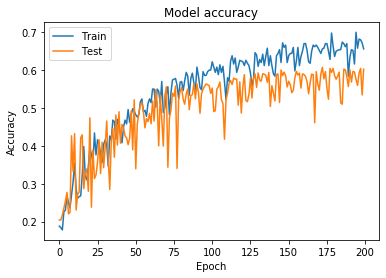

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()